<a href="https://colab.research.google.com/github/jlmarrugom/covid/blob/main/Murcilagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Base de Datos de Murcielagos

### Lectura y Corrección de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
bats = pd.read_excel('/content/drive/MyDrive/Covid UC/Base de datos murcielagos Córdoba_Dic 2020.xlsx',sheet_name='Datos')
bats['Conteo'] = 1
bats.head()

,Nro.,Cód.,Fecha de toma de muestra,Lugar,Coordenadas,Urb/Rural,Especie,Sexo,Conteo
0,1,1,2020-09-22,Sahagun,NaN,Urbano,Glossophaga soricina,Macho,1
1,2,2,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Hembra,1
2,3,3,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Macho,1
3,4,4,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Macho,1
4,5,5,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Hembra,1


In [8]:
bats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Nro.                       131 non-null    int64         
 1   Cód.                       131 non-null    int64         
 2   Fecha de  toma de muestra  131 non-null    datetime64[ns]
 3   Lugar                      131 non-null    object        
 4   Coordenadas                0 non-null      float64       
 5   Urb/Rural                  131 non-null    object        
 6   Especie                    131 non-null    object        
 7   Sexo                       131 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 8.3+ KB


In [21]:
bats['Urb/Rural'].value_counts()

Urbano     64
Urbano     54
Rural      13
Name: Urb/Rural, dtype: int64

In [79]:
bats['Urb/Rural'] = bats['Urb/Rural'].replace({'Urbano ':'Urbano'})
bats['Urb/Rural'].value_counts()

Urbano    118
Rural      13
Name: Urb/Rural, dtype: int64

### Resultados del Análisis

In [23]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Lugar']).agg(lambda x:x.value_counts().index[0])

,Especie,Urb/Rural,Sexo
Lugar,,,
Cereté,Artibeus planirostris,Urbano,Macho
Lorica,Artibeus planirostris,Urbano,Macho
Montelibano,Artibeus planirostris,Urbano,Macho
Montería,Artibeus planirostris,Urbano,Macho
Planeta Rica,Artibeus planirostris,Urbano,Hembra
Sahagun,Artibeus planirostris,Urbano,Macho
San Antero,Artibeus planirostris,Urbano,Macho
Tierralta,Artibeus planirostris,Rural,Macho


*La especie más común de Murcielagos por municipio es la Artibeus planirostris, y el sexo Masculino. Los muestreos se hicieron mayoritariamente en entornos Urbanos. En planeta Rica se encontrarón más murcielagos con sexo femenino, y en Tierralta la mayoría de los muestreos se hicieron en entornos Rurales*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Municipio')

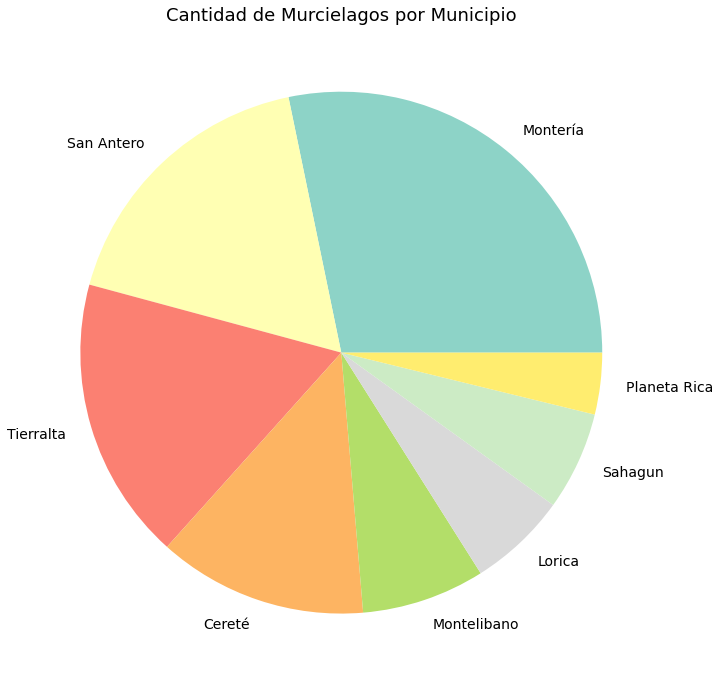

In [70]:
bats[['Conteo','Lugar']].groupby(['Lugar']).sum().sort_values(by='Conteo',ascending=False).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='Set3',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Municipio',fontdict={'fontsize':18})

*La mayor variedad en especies de murcielagos se encontró en Montería, seguida de Tierralta y San Antero.*

In [24]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Especie']).agg(lambda x:x.value_counts().index[0])

,Urb/Rural,Sexo,Lugar
Especie,,,
Artibeus lituratus,Urbano,Hembra,Montería
Artibeus planirostris,Urbano,Macho,Montería
Carollia perspicillata,Urbano,Macho,Montelibano
Desmodus rotundus,Urbano,Macho,San Antero
Glossophaga soricina,Urbano,Hembra,Montería
Molossus molossus,Urbano,Macho,Tierralta
Myotis nigricans,Urbano,Hembra,Montería
Noctilio alvibentris,Urbano,Macho,Montería
Phillostomus discolor,Urbano,Macho,Montería


*Podemos ver la mayor representación que tuvo cada especie.*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Especie')

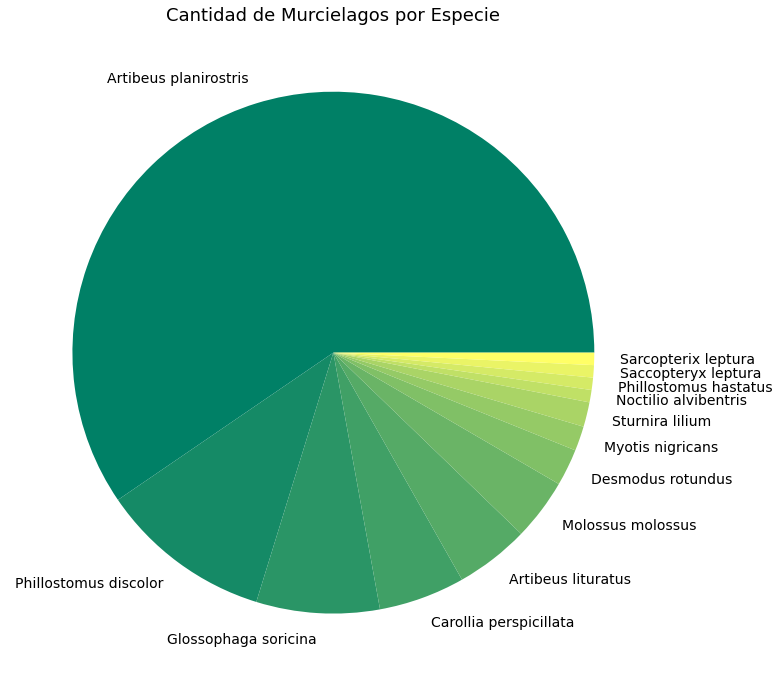

In [74]:
bats[['Conteo','Especie']].groupby(['Especie']).sum().sort_values(by='Conteo',ascending=False).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='summer',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Especie',fontdict={'fontsize':18})

*Las 3 especies más comunes encontradas fueron:*

*1. Artibeus planirostris.*

*2. Phillostomus discolor.*

*3. Glossophaga soricina.*


In [25]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Urb/Rural']).agg(lambda x:x.value_counts().index[0])

,Especie,Sexo,Lugar
Urb/Rural,,,
Rural,Artibeus planirostris,Macho,Tierralta
Urbano,Artibeus planirostris,Macho,Montería


*Tanto en entornos Rurales como Urbanos la especie más común es el Artibeus planirostris, el sexo más común es el masculino*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Entorno')

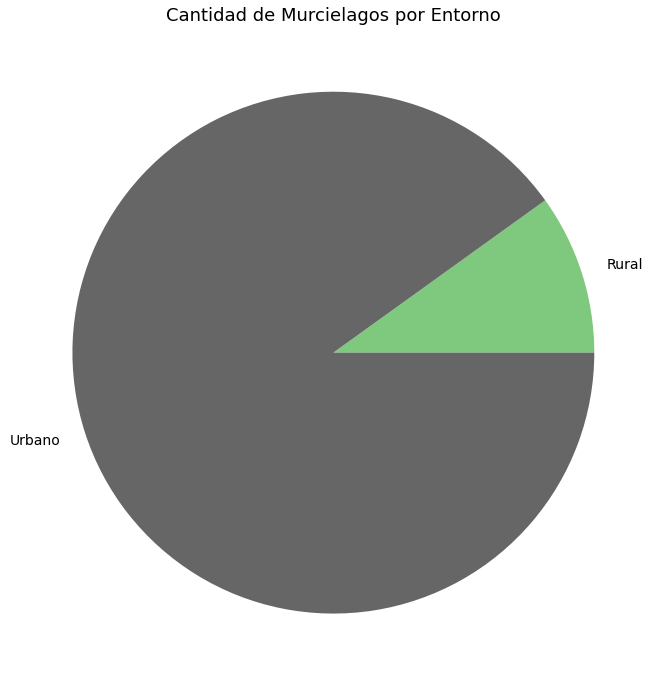

In [87]:
bats[['Conteo','Urb/Rural']].groupby(['Urb/Rural']).sum().sort_values(by='Conteo',ascending=True).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='Accent',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Entorno',fontdict={'fontsize':18})

*Los muestreos fueron en areas Urbanas mayoritariamente.*

In [26]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Sexo']).agg(lambda x:x.value_counts().index[0])

,Especie,Urb/Rural,Lugar
Sexo,,,
Hembra,Artibeus planirostris,Urbano,Montería
Macho,Artibeus planirostris,Urbano,Montería


*En Montería, entornos Urbanos, la especie Artibeus planirostris fueron las caracteristicas más representativas que compartían tanto machos como hembras.*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Sexo')

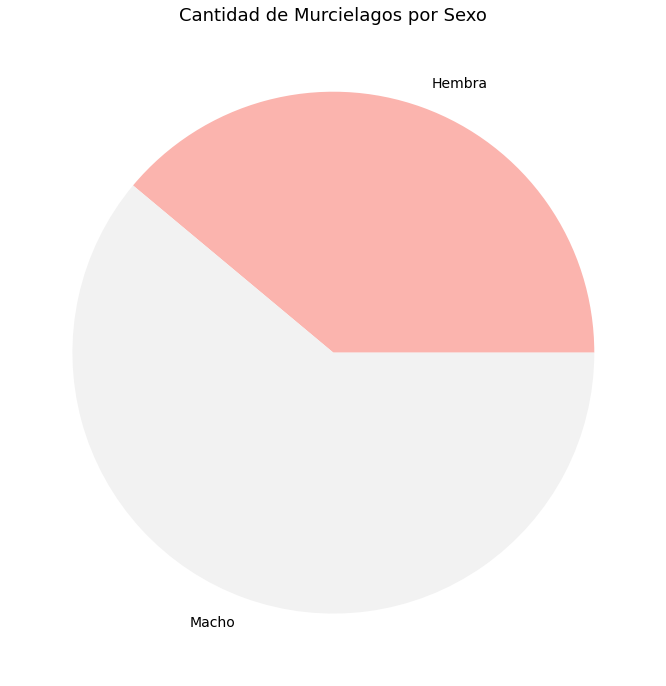

In [90]:
bats[['Conteo','Sexo']].groupby(['Sexo']).sum().sort_values(by='Conteo',ascending=True).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='Pastel1',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Sexo',fontdict={'fontsize':18})

*La mayoría de Murcielagos recolectados tuvo Sexo Marculino*